## BBM 409 - Programming Assignment 4

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (irem, saygı, 2200356103)

## Understanding LSTM's with Sentiment Analysis (100 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.

The goal of this assignment is to gain a deeper understanding of Recurrent Neural Networks (RNNs), with a particular focus on Long Short-Term Memory (LSTM) networks, by applying them to the task of sentiment analysis. The assignment involves implementing an LSTM-based model from scratch using the deep learning framework PyTorch. This model is designed to classify movie reviews as either positive or negative. The implementation will include key components such as an embedding layer for word representations, an LSTM layer to process sequential data, and a fully connected layer for binary classification. The model will be trained, validated, and tested on a subset of the IMDB Movie Reviews Dataset. Through this exercise, you will explore the challenges of handling sequential data, the benefits of LSTMs over traditional RNNs, and the steps involved in preparing text data for deep learning models.
* Description of the dataset used for analysis.

The dataset used for this task is the IMDB Movie Reviews Dataset, a widely recognized benchmark for sentiment analysis. It consists of 10,000 labeled movie reviews, with an equal number of positive and negative reviews, ensuring a balanced class distribution. This balance allows for fair evaluation of the model’s performance. The dataset presents real-world challenges, such as varying review lengths and informal language, making it an excellent choice for exploring the capabilities of LSTM networks in handling sequential and context-dependent data.

Before feeding the data into the model, several preprocessing steps are applied. These include cleaning the text by removing special characters, punctuation, and HTML tags, converting the text to lowercase, and tokenizing the reviews into individual words. Each word is then mapped to a unique integer index using a vocabulary dictionary. To ensure uniform input lengths for the LSTM model, the tokenized sequences are either padded or truncated to a fixed length, determined by analyzing the distribution of review lengths in the dataset. Finally, the dataset is split into three subsets: 70% for training, 20% for validation, and 10% for testing, enabling the model to learn effectively while being evaluated on unseen data.

This dataset is particularly well-suited for sentiment analysis tasks as it allows the LSTM model to learn temporal dependencies and semantic relationships between words, making it an ideal choice for exploring the effectiveness of LSTM networks in processing sequential data.

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd

In [ ]:
# Mounting Google Drive
drive.mount('/content/drive')

# Path to the file
file_path = '/content/drive/My Drive/subset10000_IMDB_Dataset.csv'  # Example: 'IMDB Reviews.csv'

# Loading the data into pandas a dataframe
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Checking the size of the dataset
print("\nDataset size:")
print(data.shape)

## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Represent the sentiments in a meaningful numerical form

# Converting sentiments to numerical representation
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Verifying the numerical representation of the sentiment
print("\nDataset after converting sentiments to numerical representation:")

print(data.head())
# Checking the first few rows

print("\nSummary statistics:")
print(data.describe())

Mounted at /content/drive
First few rows of the dataset:
                                              review sentiment
0  Starts really well, nice intro and build up fo...  negative
1  Terrific movie: If you did not watch yet, you ...  positive
2  I've seen hundreds of silent movies. Some will...  positive
3  i had been looking for this film for so long b...  positive
4  Good: Engaging cinematic firefights, great pre...  positive

Dataset size:
(10000, 2)

Missing values:
review       0
sentiment    0
dtype: int64

Dataset after converting sentiments to numerical representation:
                                              review  sentiment
0  Starts really well, nice intro and build up fo...          0
1  Terrific movie: If you did not watch yet, you ...          1
2  I've seen hundreds of silent movies. Some will...          1
3  i had been looking for this film for so long b...          1
4  Good: Engaging cinematic firefights, great pre...          1

Summary statistics:
        

### 2. Preprocessing the Data (10 points)

The code below prepares a text dataset for sentiment analysis by applying several preprocessing steps to clean and structure the data. First, it processes each review using the preprocess_text function, which replaces contractions (e.g., "can't" becomes "cannot"), removes URLs, email addresses, HTML tags, and special characters, converts the text to lowercase, tokenizes it into words, and optionally removes stopwords and lemmatizes the tokens. The cleaned and tokenized reviews are then analyzed to generate token statistics, including the total and unique number of tokens, average tokens per review, and the most frequently used words. A vocabulary is created from the unique tokens, mapping each word to a unique numerical index. The length of each review is analyzed, and a fixed maximum sequence length (max_len) is determined based on the mean and standard deviation of review lengths.

Each review is then converted into a list of numerical indices corresponding to its tokens using the vocabulary. To handle the varying lengths of reviews, sequences are padded or truncated to the fixed max_len, ensuring all sequences are of uniform length. This process adds a new column, padded_indices, which contains the numerical and padded representation of each review. The resulting dataset includes columns for the original reviews, their tokenized versions, and the padded numerical sequences. This structured dataset is now ready to be used as input for a deep learning model, such as an LSTM, for sentiment analysis.

In [ ]:
!pip install keras
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('punkt', force=True)
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# An example function for prepocess the texts and create the tokens, you can improve it to clean the texts more accurately
def preprocess_text(text, remove_stopwords=True, lemmatize=True):
    if not isinstance(text, str):
        return []

    # Replace contractions
    contractions = {
        "won't": "will not",
        "can't": "cannot",
        "n't": " not",
        "'s": " is",
        "'m": " am",
        "'re": " are",
        "'ll": " will",
        "'ve": " have",
        "'d": " would"
    }
    for contraction, replacement in contractions.items():
        text = text.replace(contraction, replacement)

    # Removing URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Removing email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Replacing slashes and other separators with spaces
    text = re.sub(r'[\\/|_]', ' ', text)

    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Removing numbers and digits
    text = re.sub(r'\d+', '', text)

    # Converting to lowercase
    text = text.lower()

    # Removing special characters but keep sentence structure for better tokenization
    text = re.sub(r'[^a-z\s.,!?]', '', text)

    # Removing extra whitespace
    text = ' '.join(text.split())

    # Tokenizing
    tokens = word_tokenize(text)

    # Removing stop words if specified
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize if specified
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove any remaining punctuation tokens and empty strings
    tokens = [token for token in tokens if token.isalpha() and len(token) > 1]
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def get_token_statistics(tokens_list):

    # Flatten list of tokens
    all_tokens = [token for tokens in tokens_list for token in tokens]

    # Counting token frequencies
    token_freq = {}
    for token in all_tokens:
        token_freq[token] = token_freq.get(token, 0) + 1

    stats = {
        'total_tokens': len(all_tokens),
        'unique_tokens': len(set(all_tokens)),
        'avg_tokens_per_doc': len(all_tokens) / len(tokens_list) if tokens_list else 0,
        'most_common': sorted(token_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    }

    return stats


# Adding a tokens column to the dataframe to store preprocessed tokens
data['tokens'] = data['review'].apply(preprocess_text)

# Building the vocabulary using the tokens
vocabulary = set(word for tokens in data['tokens'] for word in tokens)
vocab_to_index = {word: i + 1 for i, word in enumerate(vocabulary)}

# Getting statistics about the tokens
token_stats = get_token_statistics(data['tokens'].tolist())

print("\nToken Statistics:")
print(f"Total number of tokens: {token_stats['total_tokens']}")
print(f"Number of unique tokens: {token_stats['unique_tokens']}")
print(f"Average tokens per document: {token_stats['avg_tokens_per_doc']:.2f}")
print("\nMost common tokens:")
for token, freq in token_stats['most_common']:
    print(f"  {token}: {freq}")

# Assign indices to each token in the vocabulary
# Reserve 0 for padding


Token Statistics:
Total number of tokens: 1140900
Number of unique tokens: 54719
Average tokens per document: 114.09

Most common tokens:
  movie: 19884
  film: 18281
  one: 10766
  like: 7905
  would: 6256
  time: 5918
  character: 5729
  good: 5586
  even: 4911
  get: 4877


In [ ]:
# Calculating the length of each review from the tokenized version
data['review_length'] = data['tokens'].apply(len)

# Displaying statistical details about review lengths
print("\nReview length statistics:")
print(data['review_length'].describe())
# Decide padding length considering these stats
max_len = int(data['review_length'].mean() + 2 * data['review_length'].std())  # Example choice
print(f"\nChosen padding length: {max_len}")
# Remember we don't want padded zeros to overcome meaningful information in the sequence


Review length statistics:
count    10000.000000
mean       114.090000
std         86.337455
min          4.000000
25%         61.000000
50%         85.000000
75%        140.000000
max        789.000000
Name: review_length, dtype: float64

Chosen padding length: 286


In [ ]:
# Converting review tokens to indices and add an indices column to the dataframe to store
def tokens_to_indices(tokens):
    return [vocab_to_index.get(token, 0) for token in tokens]

# Representing each token in the dataset with its corresponding index from the vocabulary
data['indices'] = data['tokens'].apply(tokens_to_indices)

# Ensure all sequences have the same length by padding shorter sequences with zeros
# Pad the token indices version of review sequences


def pad_sequence(seq, max_len):
    padded_indices = seq[:max_len] + [0] * max(0, max_len - len(seq))
    return padded_indices

# Adding an padded_indices column to store padded sequences

data['padded_indices'] = data['indices'].apply(lambda seq: pad_sequence(seq, max_len))

print("\nDataset with padded sequences:")
print(data[['review', 'tokens', 'padded_indices']].head())


Dataset with padded sequences:
                                              review  \
0  Starts really well, nice intro and build up fo...   
1  Terrific movie: If you did not watch yet, you ...   
2  I've seen hundreds of silent movies. Some will...   
3  i had been looking for this film for so long b...   
4  Good: Engaging cinematic firefights, great pre...   

                                              tokens  \
0  [start, really, well, nice, intro, build, main...   
1  [terrific, movie, watch, yet, must, watch, gee...   
2  [seen, hundred, silent, movie, always, classic...   
3  [looking, film, long, found, seen, younger, lo...   
4  [good, engaging, cinematic, firefights, great,...   

                                      padded_indices  
0  [13717, 52916, 1938, 45577, 26055, 50779, 3399...  
1  [16254, 49289, 41724, 25323, 43945, 41724, 262...  
2  [12364, 23660, 22202, 49289, 5519, 30291, 1158...  
3  [12366, 12162, 16950, 1869, 12364, 24215, 1124...  
4  [48816, 44086, 2

### 3. Visualzing Word Vectors (15 points)

In [ ]:
# Loading the FastText word vectors
import gensim.downloader as api
fasttext_vectors = api.load("fasttext-wiki-news-subwords-300")
print("FastText model loaded.")

[==================================================] 100.0% 958.5/958.4MB downloaded
FastText model loaded.


The code below analyzes the relationship between the vocabulary from the dataset and pre-trained FastText word vectors. The analyze_oov_words function checks how many words in the dataset's vocabulary are not found in the FastText embeddings (out-of-vocabulary, or OOV words). It categorizes words into two groups: those found in the FastText vocabulary (in_vocab_words) and those not found (oov_words). It also calculates the percentage of OOV words and provides examples of such words to help understand the mismatch.

The get_most_frequent_words function identifies the most common words in the dataset by counting token frequencies. It also ensures the inclusion of sentiment-rich words like "good," "bad," and "amazing" to capture meaningful patterns for sentiment analysis. After selecting the most frequent words, the function filters out any words that are not present in the FastText vocabulary, retaining only those that can be represented by the pre-trained word vectors. This step is important because OOV words, which lack embeddings, can negatively impact the model’s performance by introducing missing or meaningless input representations. By focusing on words available in FastText, the code ensures that the model works with valid and semantically rich inputs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from collections import Counter
# Check out for Out-of-Vocaublary (OOV) words

def analyze_oov_words(vocabulary, fasttext_vectors):

    oov_words = []
    in_vocab_words = []

    for word in vocabulary:
        if word not in fasttext_vectors:
            oov_words.append(word)
        else:
            in_vocab_words.append(word)

    print(f"\nVocabulary Analysis:")
    print(f"Total vocabulary size: {len(vocabulary)}")
    print(f"Words found in FastText: {len(in_vocab_words)}")
    print(f"Out-of-vocabulary words: {len(oov_words)}")
    print(f"OOV percentage: {len(oov_words)/len(vocabulary)*100:.2f}%")

    # Showing example OOV words
    print("\nExample OOV words:")
    print(oov_words)

    return oov_words, in_vocab_words

# See how many words in your created vocaublary are not presented in fasttext-vectors
def get_most_frequent_words(data, n=300):

    # Flatten all tokens
    all_tokens = [word for tokens in data['tokens'] for word in tokens]

    # Count frequencies
    word_freq = Counter(all_tokens)

    sentiment_words = ['good', 'bad', 'amazing', 'terrible', 'excellent', 'poor',
                      'great', 'worst', 'nice', 'awful']

    frequent_words = [word for word, _ in word_freq.most_common(n)]

    selected_words = list(set(frequent_words))

    # Filter words that exist in FastText vocabulary
    selected_words = [word for word in selected_words if word in fasttext_vectors]

    return selected_words
# Make comments on how OOV words can effect your model performance

The code below is used to visualize and analyze word vectors from the pre-trained FastText embeddings, helping to understand their behavior and relationships. The `visualize_word_vectors` function creates 2D or 3D visualizations of word vectors using **Principal Component Analysis (PCA)**, which reduces the high-dimensional word vectors (e.g., 300 dimensions) to a manageable 2D or 3D space for plotting. It retrieves word vectors for a given set of words, reduces their dimensionality, and plots them. In the 2D visualization, each word is represented as a point on a scatter plot, and the word itself is annotated near its position. Similarly, for 3D visualization, a 3D scatter plot is created with word annotations, allowing an interactive exploration of relationships between words.

The `analyze_word_relationships` function explores semantic relationships between specific words using the FastText embeddings. It calculates similarity scores between pairs of words, such as "good" and "bad" or "love" and "hate," showing how closely related these words are in the embedding space. Additionally, for a set of sentiment-related words (e.g., "good," "bad," "excellent," "terrible"), it finds and lists the top 5 most similar words along with their similarity scores. This analysis helps understand how FastText embeddings capture the meaning and relationships between words, such as synonyms and antonyms, and how these embeddings can aid in tasks like sentiment analysis.

Out-of-vocabulary (OOV) words are words that were not present in the training data and therefore don't have corresponding embeddings in the pre-trained model. When these words appear in the test data, the model can't understand their meaning and assigns random or default embeddings. This can negatively impact the model's ability to correctly classify the sentiment, especially if these OOV words carry important context. Reducing the number of OOV words or using embeddings that cover a wider vocabulary can improve the model's performance.

In [ ]:
# Visualize word vectors to understand how they work.

# For the selected words, retrieve their corresponding vector representations from the the pre-trained Word2Vec model.
# Each word will have a dense vector of a fixed dimensionality (e.g., 300 for fasttext-wiki-news-subwords-300).

# Use Principal Component Analysis (PCA) to reduce the dimensionality of the word vectors from their original size (e.g., 300) to 2D or 3D.
# PCA simplifies the high-dimensional data while preserving as much variance as possible, making it easier to visualize

# For 2D visualization, create a scatter plot and annotate each point with its corresponding word to provide context.
# For 3D visualization, use interactive plotting tools like matplotlib’s Axes3D to explore the spatial relationships between words dynamically.
def visualize_word_vectors(words, fasttext_vectors, n_components=2):

    # Getting vectors for words that exist in FastText
    word_vectors = []
    existing_words = []

    for word in words:
        if word in fasttext_vectors:
            word_vectors.append(fasttext_vectors[word])
            existing_words.append(word)

    # Converting to numpy array
    word_vectors = np.array(word_vectors)

    # Applying PCA
    pca = PCA(n_components=n_components)
    reduced_vectors = pca.fit_transform(word_vectors)

    # Creating visualization
    plt.figure(figsize=(15, 10))

    if n_components == 2:
        # 2D plot
        plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5)

        # Annotate points with words
        for i, word in enumerate(existing_words):
            plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

        plt.title('2D PCA Visualization of Word Vectors')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')

    else:
        # 3D plot
        ax = plt.axes(projection='3d')
        ax.scatter3D(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], alpha=0.5)

        # Annotate points with words
        for i, word in enumerate(existing_words):
            ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word)

        plt.title('3D PCA Visualization of Word Vectors')
        ax.set_xlabel('First Principal Component')
        ax.set_ylabel('Second Principal Component')
        ax.set_zlabel('Third Principal Component')

    plt.tight_layout()
    plt.show()

# Start by choosing a manageable number of words from the vocabulary, ideally 100–500.
# Focus on words that are frequent in the dataset or relevant to the task,
# Such as sentiment-rich terms like "good," "bad," "amazing," or "terrible."

def analyze_word_relationships(fasttext_vectors, words):

    print("\nWord Relationship Analysis:")

    # Example word pairs to analyze
    word_pairs = [
        ('good', 'bad'),
        ('happy', 'sad'),
        ('love', 'hate'),
        ('excellent', 'terrible')
    ]

    for word1, word2 in word_pairs:
        if word1 in fasttext_vectors and word2 in fasttext_vectors:
            similarity = fasttext_vectors.similarity(word1, word2)
            print(f"Similarity between '{word1}' and '{word2}': {similarity:.3f}")

    # Finding similar words for sentiment-related terms
    sentiment_words = ['good', 'bad', 'excellent', 'terrible']
    print("\nSimilar words:")
    for word in sentiment_words:
        if word in fasttext_vectors:
            similar_words = fasttext_vectors.most_similar(word, topn=5)
            print(f"\nMost similar to '{word}':")
            for similar_word, score in similar_words:
                print(f"  {similar_word}: {score:.3f}")




Vocabulary Analysis:
Total vocabulary size: 54719
Words found in FastText: 35188
Out-of-vocabulary words: 19531
OOV percentage: 35.69%

Example OOV words:
['fannin', 'lubitsch', 'dehli', 'excop', 'isplit', 'tvchannels', 'villars', 'sevenday', 'exmarines', 'vietcong', 'gabriella', 'giacconino', 'butzke', 'scottthomas', 'fellowstudent', 'presson', 'highconcept', 'hughie', 'almoost', 'quickgun', 'lestat', 'alexondra', 'svenole', 'twostorey', 'driscoll', 'sillyflaws', 'contected', 'janie', 'wellchoreographed', 'bloodlinestarring', 'outofwhack', 'batmanvillain', 'colditz', 'phieffer', 'lederer', 'spikyhaired', 'plaintiveness', 'muchthis', 'passedout', 'stkinks', 'hanzo', 'ferrero', 'isdownrightawesome', 'soaplike', 'tftd', 'hausman', 'caughtlike', 'havegottobekidding', 'delts', 'crusoe', 'helte', 'khrushchev', 'greenslimed', 'collectormasterfully', 'orthodoxstyle', 'guyyardleyrees', 'flemyng', 'unpharoh', 'dopesmoking', 'schumann', 'samuraisploitation', 'andaaz', 'upposed', 'homeat', 'minu

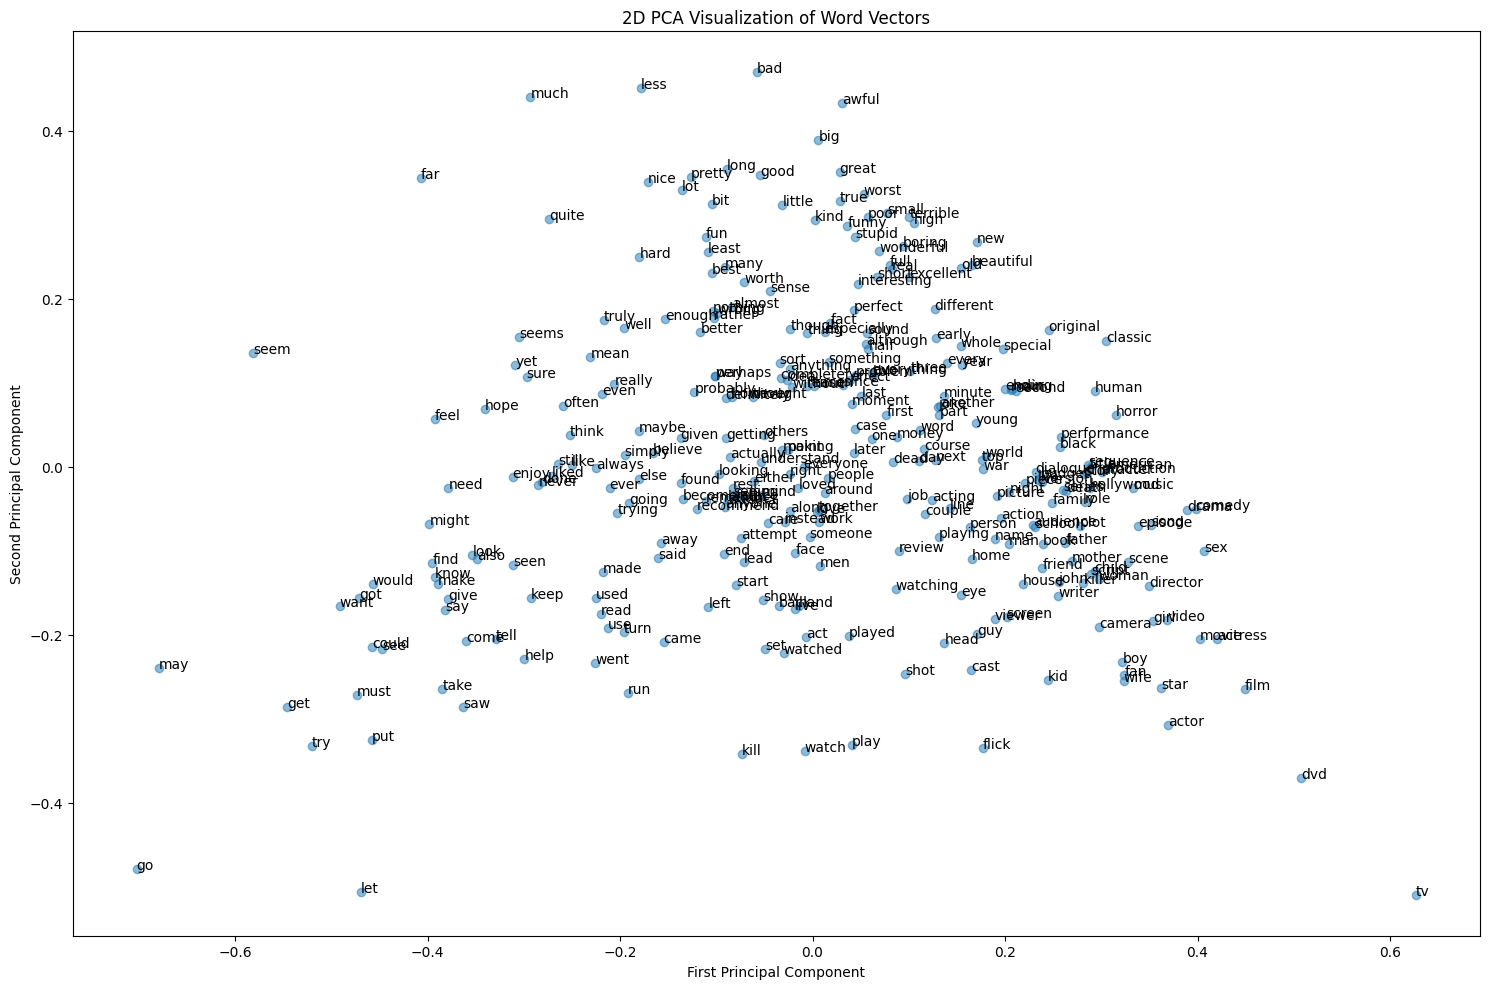


Creating 3D visualization...


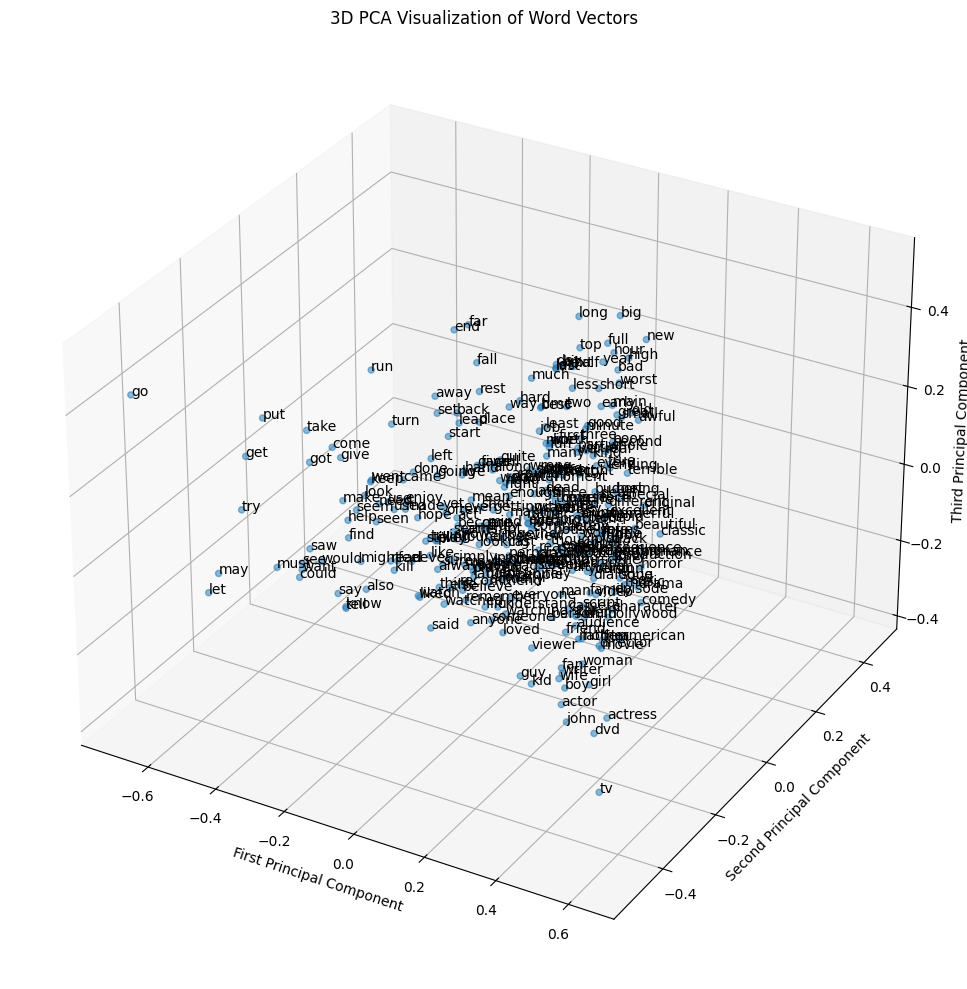


Word Relationship Analysis:
Similarity between 'good' and 'bad': 0.850
Similarity between 'happy' and 'sad': 0.690
Similarity between 'love' and 'hate': 0.740
Similarity between 'excellent' and 'terrible': 0.605

Similar words:

Most similar to 'good':
  bad: 0.850
  goood: 0.811
  excellent: 0.800
  decent: 0.781
  .good: 0.765

Most similar to 'bad':
  good: 0.850
  good-bad: 0.779
  terrible: 0.774
  lousy: 0.770
  not-so-good: 0.769

Most similar to 'excellent':
  superb: 0.830
  excelent: 0.808
  excellant: 0.804
  good: 0.800
  wonderful: 0.772

Most similar to 'terrible':
  horrible: 0.954
  awful: 0.925
  dreadful: 0.924
  horrendous: 0.873
  terrrible: 0.866


In [ ]:
# Examine the resulting visualization for patterns.
# Look for clusters of similar words, such as synonyms or words with similar sentiment,
oov_words, in_vocab_words = analyze_oov_words(vocabulary, fasttext_vectors)

# Get most frequent words for visualization
frequent_words = get_most_frequent_words(data, n=300)


print("\nCreating 2D visualization...")
visualize_word_vectors(frequent_words, fasttext_vectors, n_components=2)

print("\nCreating 3D visualization...")
visualize_word_vectors(frequent_words, fasttext_vectors, n_components=3)

# Analyzing word relationships
analyze_word_relationships(fasttext_vectors, frequent_words)

# Observe the distances between opposite terms.
# Demonstrate how word vectors capture semantic relationships.

The Word Relationship Analysis shows how well the model understands word meanings and relationships. For example, 'good' and 'bad' have a high similarity score (0.850), meaning the model sees them as connected, even though they have opposite sentiments. Other pairs like 'happy' and 'sad' (0.690) or 'love' and 'hate' (0.740) also show some similarity, which reflects their contextual relevance.

The "Most similar" words list highlights how related words are grouped:

'Good' is similar to 'excellent' and 'decent,' but also has some connection to 'bad,' which could cause confusion.

'Bad' is linked to negative words like 'terrible' and 'lousy.'

'Excellent' is close to positive words like 'superb' and 'wonderful.'

'Terrible' is strongly related to negative words like 'horrible' and 'awful.'

In general, the model does a good job capturing word relationships and sentiment. However, the high similarity between some opposite words, like 'good' and 'bad,' might make it harder to separate positive and negative sentiments in some cases.

### 4. Creating the Emebdding Matrix (10 points)

The code below sets up an embedding layer for a PyTorch model using pre-trained word embeddings, such as FastText. It first creates an embedding matrix where each word in the vocabulary is mapped to its corresponding vector from the pre-trained embeddings. If a word is not found in the pre-trained embeddings, it is assigned a random vector to handle out-of-vocabulary words. The embedding matrix, initially created as a NumPy array, is then converted into a PyTorch tensor. Using this tensor, a PyTorch nn.Embedding layer is initialized with the pre-trained weights, allowing the model to convert word indices into meaningful vector representations. The freeze=False parameter enables the embedding weights to be updated during training if needed. Finally, the shape of the embedding layer, which reflects the number of words in the vocabulary and the dimensionality of the word vectors, is printed to confirm its setup. This embedding layer can now be integrated into the model for processing text data.

In [ ]:
import numpy as np
import torch
import torch.nn as nn

def create_embedding_matrix(word2vec, vocab, embedding_dim):
    vocab_size = len(vocab)
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    for i, word in enumerate(vocab):
        if word in word2vec:
            embedding_matrix[i] = word2vec[word]
        else:
            # If word is not in pre-trained embeddings, initializing it randomly
            embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))
    return embedding_matrix

# Create a matrix where each row corresponds to the vector representation of a word in the vocabulary
# The embedding matrix will have dimensions [vocab_size, embedding_dim], where embedding_dim is the size of the word vectors

In [ ]:
# Convert the embedding matrix to a PyTorch tensor
# You can create the embedding layer in here or directly in the model
# Using PyTorch’s nn.Embedding.from_pretrained method you load the pre-trained embedding matrix into the embedding layer

def load_embedding_layer(embedding_matrix):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Converting the embedding matrix to a PyTorch tensor
    embedding_tensor = torch.tensor(embedding_matrix, dtype=torch.float32).to(device)

    # Creating the embedding layer and load the pre-trained weights
    embedding_layer = nn.Embedding.from_pretrained(embedding_tensor, freeze=False)  # Set freeze=True to prevent updates during training

    return embedding_layer

embedding_dim = 300  # Dimensionality of FastText embeddings
vocabulary = list(set(word for tokens in data['tokens'] for word in tokens))  # Extract vocabulary from your dataset

# Creating the embedding matrix
embedding_matrix = create_embedding_matrix(fasttext_vectors, vocabulary, embedding_dim)

# Loading the embedding matrix into a PyTorch embedding layer
embedding_layer = load_embedding_layer(embedding_matrix)

# Print embedding layer details
print("Embedding layer created with shape:", embedding_layer.weight.shape)

Embedding layer created with shape: torch.Size([54719, 300])


### 5. Implementing the IMDBDataset (5 points)
* Use PyTorch’s Dataset and DataLoader classes to manage the dataset efficiently and create mini-batches for training.

The code below prepares the dataset for training, validation, and testing in a format compatible with PyTorch. First, it defines a `SentimentDataset` class to handle sequences (padded text reviews) and corresponding sentiment labels. The class provides methods to access the length of the dataset and retrieve individual samples as PyTorch tensors. Next, it extracts the padded sequences and sentiment labels from the dataset and splits the data into training, validation, and test subsets. The training set contains 70% of the data, while the remaining 30% is split into validation (20%) and test (10%) sets. This is done using `train_test_split` from `sklearn`, ensuring that the splits maintain the same class distribution (stratification). Finally, the sizes of the training, validation, and test subsets are printed for confirmation. This setup ensures that the data is properly structured and balanced for model training and evaluation.

In [ ]:
# Train, validation and test split

In [ ]:
# Implement the dataset class

import torch
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

class SentimentDataset(Dataset):
    def __init__(self, sequences, labels):

        self.sequences = sequences
        self.labels = labels

    def __len__(self):

        return len(self.sequences)

    def __getitem__(self, idx):

        sequence = torch.tensor(self.sequences[idx], dtype=torch.long)  # Convert to tensor
        label = torch.tensor(self.labels[idx], dtype=torch.float)  # Convert to tensor
        return sequence, label

# Combining the padded sequences and corresponding sentiment labels into a dataset structure compatible with PyTorch.


# Extracting padded sequences and labels
sequences = data['padded_indices'].tolist()
labels = data['sentiment'].tolist()

# Splitting into train (70%) and temp (30%)
train_sequences, temp_sequences, train_labels, temp_labels = train_test_split(
    sequences, labels, test_size=0.3, random_state=42, stratify=labels
)

# Splitting temp into validation (20%) and test (10%)
val_sequences, test_sequences, val_labels, test_labels = train_test_split(
    temp_sequences, temp_labels, test_size=1/3, random_state=42, stratify=temp_labels
)

print(f"Training samples: {len(train_sequences)}")
print(f"Validation samples: {len(val_sequences)}")
print(f"Test samples: {len(test_sequences)}")


Training samples: 7000
Validation samples: 2000
Test samples: 1000


In this code, i prepare the training, validation, and test data for the model by creating DataLoader objects. First, SentimentDataset objects are created for the training, validation, and test datasets, containing the padded sequences and corresponding sentiment labels. Then, PyTorch's DataLoader is used to load these datasets in mini-batches for efficient training and evaluation. The batch size is set to 32, and shuffling is enabled for the training data to ensure randomness during training. For validation and test datasets, shuffling is disabled to maintain the original order. Additionally, drop_last=True is used to ensure that all batches have the same size by dropping incomplete batches if the total number of samples is not divisible by the batch size. Finally, the number of batches in each DataLoader is printed, and one batch from the training DataLoader is inspected to verify the shapes of the sequences and labels, ensuring they are compatible with the model.








In [ ]:
# Create the train, validation and test dataLoaders

# Create Dataset objects
train_dataset = SentimentDataset(train_sequences, train_labels)
val_dataset = SentimentDataset(val_sequences, val_labels)
test_dataset = SentimentDataset(test_sequences, test_labels)

# Create DataLoaders
batch_size = 32  # Define the batch size

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last = True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last = True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last = True)

print(f"Number of batches in train_loader: {len(train_loader)}")
print(f"Number of batches in val_loader: {len(val_loader)}")
print(f"Number of batches in test_loader: {len(test_loader)}")

# Inspect a batch of data
for batch_idx, (sequences, labels) in enumerate(train_loader):

    print(f"Batch {batch_idx + 1}")
    print("Sequences shape:", sequences.shape)
    print("Labels shape:", labels.shape)
    break



Number of batches in train_loader: 218
Number of batches in val_loader: 62
Number of batches in test_loader: 31
Batch 1
Sequences shape: torch.Size([32, 286])
Labels shape: torch.Size([32])


### 6. Implementing and Optimizing the Custom LSTM model (40 points)

In this code, i manually implement the structure and functionality of an LSTM cell, which is a key component of Long Short-Term Memory networks. The LSTMCell class initializes weight matrices and biases for the four gates: forget gate, input gate, cell state update gate, and output gate. During the forward pass, the input at the current time step (x_t) is concatenated with the previous hidden state (h_prev). The forget gate (f_t) determines how much of the previous cell state to retain, while the input gate (i_t) decides which new information to store. The cell state (c_t) is updated by combining the results of the forget and input gates. Finally, the output gate (o_t) generates the current hidden state (h_t) by applying a gating mechanism to the updated cell state. This implementation captures the sequential dependencies and memory retention capabilities of LSTMs.

In [ ]:
# Manually implement the LSTM cell to understand its architecture and functionality.
# Implement forget, input, and output gates.
# Update the cell state and compute the hidden state for each time step.
# Explain your steps and usage of the gates
# Check assignment pdf for more detail on implementation tips

# (below is just an empty example, you can change it entirely to make it suitable with your implementation)
import torch
import torch.nn as nn
import torch.nn.functional as F

class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMCell, self).__init__()
        # Defining weight matrices and biases for each gate

        self.input_size = input_size
        self.hidden_size = hidden_size

        # Weight matrices and biases for gates
        self.W_f = nn.Linear(input_size + hidden_size, hidden_size)  # Forget gate
        self.W_i = nn.Linear(input_size + hidden_size, hidden_size)  # Input gate
        self.W_c = nn.Linear(input_size + hidden_size, hidden_size)  # Cell state update
        self.W_o = nn.Linear(input_size + hidden_size, hidden_size)  # Output gate

    def forward(self, x_t, h_prev, c_prev):
        h_prev = h_prev.to(x_t.device)
        c_prev = c_prev.to(x_t.device)

        # Concatenating input and previous hidden state
        combined = torch.cat((x_t, h_prev), dim=1)
        # Implementing forget gate
        f_t = torch.sigmoid(self.W_f(combined))
        # Implementing input gate
        i_t = torch.sigmoid(self.W_i(combined))
        c_tilde = torch.tanh(self.W_c(combined))
        # Cell state update
        c_t = f_t * c_prev + i_t * c_tilde
        # Implementing output gate
        o_t = torch.sigmoid(self.W_o(combined))
        h_t = o_t * torch.tanh(c_t)

        return h_t, c_t


In this code, i build an LSTM layer by combining multiple LSTM cells to process a sequence of inputs. The LSTMLayer class uses the previously defined LSTMCell to process sequential data. During initialization, i define the LSTM cell and set the size of the hidden state. In the forward method, i iterate through each time step of the input sequence. At each step, the input for that time step (x_t) is passed through the LSTM cell along with the previous hidden (h_t) and cell states (c_t). The updated hidden state (h_t) is stored in the outputs list for every time step. After processing the entire sequence, i stack all the hidden states to create a sequence of outputs corresponding to each time step. This implementation captures the temporal dependencies within a sequence, allowing the LSTM layer to process sequential data effectively.

In [ ]:
# Build an LSTM layer by combining one or multiple LSTM cells to process a sequence.

# (below is just an empty example, you can change it entirely to make it suitable with your implementation)

class LSTMLayer(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMLayer, self).__init__()
        # Integrating the LSTM cell
        self.hidden_size = hidden_size
        self.lstm_cell = LSTMCell(input_size, hidden_size)


    def forward(self, x):
        # Initializing hidden and cell states
        batch_size = x.size(0)
        seq_len = x.size(1)

        h_t = torch.zeros(batch_size, self.hidden_size)
        c_t = torch.zeros(batch_size, self.hidden_size)
        outputs = []

        # Iterating through the sequence and update the hidden and cell states at each step
        for t in range(seq_len):
            x_t = x[:, t, :]  # Input at time step t
            h_t, c_t = self.lstm_cell(x_t, h_t, c_t)
            outputs.append(h_t.unsqueeze(1))

        # Stack outputs for all time steps
        outputs = torch.cat(outputs, dim=1)
        return outputs

In this code, I create an LSTM-based model for sentiment analysis called SentimentLSTM. The model starts with an embedding layer, which converts input word indices (from padded sequences) into dense vector representations using pre-trained embeddings (like Word2Vec or FastText). I set freeze=False in the embedding layer to allow fine-tuning of the word vectors during training, which helps the model adapt to the specific dataset.

Next, the processed embeddings are passed into a custom LSTMLayer, which handles the sequential data and generates hidden states for each time step. From these hidden states, i extract the last hidden state, as it contains the information aggregated across the entire sequence. This last hidden state is then passed through a fully connected (fc) layer, which maps the hidden state to a single output value for binary classification (positive or negative sentiment). Finally, a sigmoid activation function is applied to squash the output into a probability range between 0 and 1, which can be interpreted as the predicted sentiment. This model integrates embeddings, sequential processing, and a classification layer to perform sentiment analysis effectively.

In [ ]:
# Build an LSTM model. Integrate the embedding layer into the model architecture.
# The embedding layer will convert input indices (from padded sequences) into dense word vectors.
# Decide whether to freeze the embedding weights or allow them to be fine-tuned during training and explain your choice.
# These dense vectors are then passed to the LSTM layer for sequential processing.
# You can provide embedding_matrix as tensor to define embedding layer inside the model class
# Or if you have defined embedding layer before, you can directly use that inside the model class

# (below is just an empty example, you can change it entirely to make it suitable with your implementation)

class SentimentLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, embedding_matrix):
        super(SentimentLSTM, self).__init__()
        # Embedding Layer: Use pre-trained Word2Vec embeddings.
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)
        # Custom LSTM Layer: Process the input sequence to generate hidden states.
        self.lstm_layer = LSTMLayer(input_size, hidden_size)
        # Dense Output Layer: Use a fully connected layer with a sigmoid activation for binary classification.
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass input through the embedding layer
        x = self.embedding(x)
        lstm_output = self.lstm_layer(x)
        # Get the LSTM layers output
        # Use the last hidden state
        last_hidden_state = lstm_output[:, -1, :]
        output = self.fc(last_hidden_state)
        output_ = self.sigmoid(output)
        return output_

This process is essential for performing sentiment analysis, which helps me classify text (like reviews) as either "positive" or "negative." Sentiment analysis is widely used to understand customer feedback, analyze social media posts, and determine overall opinions about products or services. By building this model, I can automate the process of analyzing text data and extracting meaningful insights, saving both time and effort.

Why did I create 3 implementations?

Manual LSTM Cell: I implemented the LSTM cell manually to understand how it works internally. This included designing the forget, input, and output gates to update the cell and hidden states step by step. This helped me fully grasp the core architecture of LSTM networks and how they handle sequential data.

LSTM Layer: I combined multiple LSTM cells to process sequences of data over time steps. This showed me how to handle sequential inputs and stack outputs for each time step, which is crucial for tasks like language processing.

Complete LSTM Model: Finally, I used PyTorch's built-in LSTM layer to build a complete sentiment analysis model. This included an embedding layer for word vectors, the LSTM layer for processing sequences, and a fully connected layer with a sigmoid activation for binary classification. This approach is more practical and efficient for real-world applications.

Why is this important?

By going through these steps, I gained both theoretical knowledge (understanding the inner workings of LSTMs) and practical skills (building a functional sentiment analysis model). The manual implementation helped me understand the details, while the final model is optimized and ready for real-world use. This process ensures that I understand the "why" behind each step while creating a working solution that I can apply to actual datasets.








In [ ]:
# Define the hyperparameters and try to optimize your model by experimenting with these
input_size = 300 # This will be the word vector size
hidden_size = 128
epochs = 50 # at least
learning_rate = 0.001
batch_size = 32
output_size = 1

These hyperparameters control how my model learns and processes the data. The `input_size` represents the size of the word vectors, which capture the semantic meaning of each word. The `hidden_size` defines the size of the LSTM's hidden state, which stores information about the sequence and helps the model understand patterns. The `epochs` specify how many times the entire dataset is passed through the model during training, giving it enough time to learn without overfitting. The `learning_rate` controls how much the model's weights are updated during optimization, balancing stable learning with training speed. The `batch_size` determines how many samples are processed at once, ensuring efficient training while managing memory usage. Lastly, the `output_size` indicates that this is a binary classification task, where the output represents the probability of a positive or negative sentiment. Together, these parameters shape the training process and help me build an effective sentiment analysis model.

In [ ]:
# Define appropriate loss function for binary classification.
# Choose an optimizer and set its parameters (e.g., learning rate).
# Explain your choice of loss function and optimization algorithm.
import torch.optim as optim

# LoadİNG pre-trained embedding matrix (e.g., FastText)
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

# Initializing the model
model = SentimentLSTM(input_size, hidden_size, output_size, embedding_matrix)

# Defining loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def calculate_loss(model, loader, criterion, device='cuda'):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    model.eval()

    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for sequences, labels in loader:
            sequences = torch.clamp(sequences, 0, embedding_layer.num_embeddings - 1).to(device)
            sequences, labels = sequences.to(device), labels.to(device)

            # Forward pass
            outputs = model(sequences).squeeze()

            # Compute loss
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = (outputs >= 0.5).float()  # Applying threshold of 0.5 for binary classification
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    # Return the average loss
    val_loss = val_loss / len(val_loader)
    val_accuracy = correct_val / total_val * 100

    return val_loss, val_accuracy


criterion = nn.BCELoss()


I chose the Adam optimizer because it is one of the most efficient and widely used optimizers in deep learning. Adam combines the benefits of two other optimizers, RMSprop and Stochastic Gradient Descent (SGD), by adapting the learning rate for each parameter during training. This means it adjusts how much each parameter is updated based on its performance, which makes the training faster and more stable.

Another reason for choosing Adam is that it works well with noisy data and requires less manual tuning of the learning rate compared to other optimizers. It’s particularly helpful in tasks like sentiment analysis, where the model needs to learn patterns from complex and sequential data efficiently. Overall, Adam is a reliable and practical choice for this type of deep learning task.

In [ ]:
# Implement the training loop
# Iterate over the training dataset in mini-batches.
# Implement forward pass, feed the inputs through the network to compute the predictions.
# Validate the model on the validation set periodically to monitor performance
from tqdm import tqdm

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    best_val_acc = 0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct_train = 0
        total_train = 0

        for sequences, labels in tqdm(train_loader):
            '''print(f"Sequences Shape: {sequences.shape}, Labels Shape: {labels.shape}")
            print(f"Sequences dtype: {sequences.dtype}, Labels dtype: {labels.dtype}")

            print(f"Vocabulary Size: {embedding_matrix.size(0)}")
            print(f"Max Index in Sequences: {sequences.max()}")
            print(f"Min Index in Sequences: {sequences.min()}")'''

            sequences = torch.clamp(sequences, 0, embedding_layer.num_embeddings - 1).to(device)

            sequences = sequences.type(torch.long).to(device)
            labels = labels.type(torch.float32).to(device)

            # Forward pass
            outputs = model(sequences).squeeze()
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            preds = (outputs >= 0.5).float()  # Applying threshold of 0.5 for binary classification
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        # Computing average training loss
        train_loss = train_loss / len(train_loader)
        train_accuracy = correct_train / total_train * 100
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Computing validation loss using the separate function
        val_loss, val_accuracy = calculate_loss(model, val_loader, criterion)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
            f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
        print("--------------------")

        # Save the best model
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            model_path = '/content/best_sentiment_lstm.pth'
            torch.save(model.state_dict(), model_path)
            print(f"Model saved at: {model_path}")

    return train_losses, val_losses, train_accuracies, val_accuracies


This code is used to train a sentiment analysis model with an LSTM. The process starts by defining the loss function, Binary Cross-Entropy Loss (BCELoss), which is designed for binary classification. It helps measure how well the predicted probabilities match the actual labels. The Adam optimizer is used because it adjusts the learning rate automatically, making the training process more efficient and stable.

The `train_model` function manages the training process over a set number of epochs. During each epoch, the model processes small batches of data (sequences and labels), calculates the loss, and updates its parameters to improve predictions using backpropagation. The model's performance is periodically evaluated on unseen validation data, allowing us to track its progress. If the validation accuracy improves, the model is saved as the "best model" for future use. Additionally, the `calculate_loss` function is used to calculate both the validation loss and accuracy, providing a clear picture of how well the model is performing during training.

In [ ]:
# Visualize the accuracy and loss change of the best model across training and validation datasets
# Make comments on the results

import matplotlib.pyplot as plt

def plot_loss_curves(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()


100%|██████████| 218/218 [01:22<00:00,  2.66it/s]


Epoch 1/50, Train Loss: 0.6523, Train Acc: 52.75%, Val Loss: 0.7458, Val Acc: 50.86%
--------------------
Model saved at: /content/best_sentiment_lstm.pth


100%|██████████| 218/218 [01:20<00:00,  2.71it/s]


Epoch 2/50, Train Loss: 0.6524, Train Acc: 53.08%, Val Loss: 0.7504, Val Acc: 49.90%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 3/50, Train Loss: 0.6523, Train Acc: 52.19%, Val Loss: 0.7496, Val Acc: 50.76%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 4/50, Train Loss: 0.6522, Train Acc: 52.54%, Val Loss: 0.7526, Val Acc: 50.76%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 5/50, Train Loss: 0.6514, Train Acc: 54.03%, Val Loss: 0.7551, Val Acc: 50.66%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 6/50, Train Loss: 0.6512, Train Acc: 53.99%, Val Loss: 0.7621, Val Acc: 49.90%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.69it/s]


Epoch 7/50, Train Loss: 0.6508, Train Acc: 53.41%, Val Loss: 0.7679, Val Acc: 50.50%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.68it/s]


Epoch 8/50, Train Loss: 0.6493, Train Acc: 53.73%, Val Loss: 0.7706, Val Acc: 49.50%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 9/50, Train Loss: 0.6500, Train Acc: 53.04%, Val Loss: 0.7688, Val Acc: 49.75%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 10/50, Train Loss: 0.6491, Train Acc: 53.28%, Val Loss: 0.7581, Val Acc: 51.11%
--------------------
Model saved at: /content/best_sentiment_lstm.pth


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 11/50, Train Loss: 0.6485, Train Acc: 52.97%, Val Loss: 0.7675, Val Acc: 50.81%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 12/50, Train Loss: 0.6482, Train Acc: 54.27%, Val Loss: 0.7711, Val Acc: 49.60%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 13/50, Train Loss: 0.6472, Train Acc: 53.84%, Val Loss: 0.7777, Val Acc: 50.76%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 14/50, Train Loss: 0.6446, Train Acc: 54.10%, Val Loss: 0.7768, Val Acc: 50.96%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 15/50, Train Loss: 0.6443, Train Acc: 53.83%, Val Loss: 0.8020, Val Acc: 51.92%
--------------------
Model saved at: /content/best_sentiment_lstm.pth


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 16/50, Train Loss: 0.6423, Train Acc: 55.05%, Val Loss: 0.7845, Val Acc: 50.86%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.69it/s]


Epoch 17/50, Train Loss: 0.6391, Train Acc: 55.39%, Val Loss: 0.7969, Val Acc: 51.51%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 18/50, Train Loss: 0.6195, Train Acc: 61.44%, Val Loss: 0.6239, Val Acc: 70.87%
--------------------
Model saved at: /content/best_sentiment_lstm.pth


100%|██████████| 218/218 [01:21<00:00,  2.67it/s]


Epoch 19/50, Train Loss: 0.4882, Train Acc: 77.67%, Val Loss: 0.5628, Val Acc: 75.05%
--------------------
Model saved at: /content/best_sentiment_lstm.pth


100%|██████████| 218/218 [01:21<00:00,  2.67it/s]


Epoch 20/50, Train Loss: 0.3449, Train Acc: 86.71%, Val Loss: 0.5503, Val Acc: 77.27%
--------------------
Model saved at: /content/best_sentiment_lstm.pth


100%|██████████| 218/218 [01:21<00:00,  2.67it/s]


Epoch 21/50, Train Loss: 0.2415, Train Acc: 91.56%, Val Loss: 0.5716, Val Acc: 79.89%
--------------------
Model saved at: /content/best_sentiment_lstm.pth


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 22/50, Train Loss: 0.1756, Train Acc: 94.61%, Val Loss: 0.6170, Val Acc: 79.39%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 23/50, Train Loss: 0.1279, Train Acc: 96.47%, Val Loss: 0.5856, Val Acc: 79.79%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 24/50, Train Loss: 0.1002, Train Acc: 97.55%, Val Loss: 0.6170, Val Acc: 79.74%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.66it/s]


Epoch 25/50, Train Loss: 0.0791, Train Acc: 98.25%, Val Loss: 0.7263, Val Acc: 80.70%
--------------------
Model saved at: /content/best_sentiment_lstm.pth


100%|██████████| 218/218 [01:20<00:00,  2.71it/s]


Epoch 26/50, Train Loss: 0.0603, Train Acc: 98.65%, Val Loss: 0.7699, Val Acc: 80.44%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.72it/s]


Epoch 27/50, Train Loss: 0.0454, Train Acc: 99.10%, Val Loss: 0.6878, Val Acc: 81.40%
--------------------
Model saved at: /content/best_sentiment_lstm.pth


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 28/50, Train Loss: 0.0353, Train Acc: 99.31%, Val Loss: 0.8936, Val Acc: 79.94%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.71it/s]


Epoch 29/50, Train Loss: 0.0260, Train Acc: 99.51%, Val Loss: 0.9490, Val Acc: 80.14%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 30/50, Train Loss: 0.0199, Train Acc: 99.61%, Val Loss: 0.9212, Val Acc: 79.89%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.71it/s]


Epoch 31/50, Train Loss: 0.0156, Train Acc: 99.73%, Val Loss: 0.9376, Val Acc: 79.99%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 32/50, Train Loss: 0.0130, Train Acc: 99.80%, Val Loss: 1.0560, Val Acc: 79.99%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 33/50, Train Loss: 0.0094, Train Acc: 99.86%, Val Loss: 1.0315, Val Acc: 80.75%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 34/50, Train Loss: 0.0080, Train Acc: 99.87%, Val Loss: 1.0427, Val Acc: 80.24%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.68it/s]


Epoch 35/50, Train Loss: 0.0067, Train Acc: 99.89%, Val Loss: 1.0645, Val Acc: 80.44%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 36/50, Train Loss: 0.0057, Train Acc: 99.91%, Val Loss: 1.2306, Val Acc: 79.89%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.69it/s]


Epoch 37/50, Train Loss: 0.0054, Train Acc: 99.91%, Val Loss: 1.1218, Val Acc: 79.64%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.68it/s]


Epoch 38/50, Train Loss: 0.0053, Train Acc: 99.91%, Val Loss: 1.2705, Val Acc: 80.49%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 39/50, Train Loss: 0.0043, Train Acc: 99.91%, Val Loss: 1.2539, Val Acc: 80.34%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 40/50, Train Loss: 0.0047, Train Acc: 99.93%, Val Loss: 1.0331, Val Acc: 80.24%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 41/50, Train Loss: 0.0207, Train Acc: 99.51%, Val Loss: 1.0031, Val Acc: 79.49%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.69it/s]


Epoch 42/50, Train Loss: 0.0121, Train Acc: 99.68%, Val Loss: 0.9803, Val Acc: 79.94%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.69it/s]


Epoch 43/50, Train Loss: 0.0052, Train Acc: 99.89%, Val Loss: 1.1860, Val Acc: 79.89%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.68it/s]


Epoch 44/50, Train Loss: 0.0033, Train Acc: 99.96%, Val Loss: 1.2261, Val Acc: 79.64%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 45/50, Train Loss: 0.0040, Train Acc: 99.93%, Val Loss: 1.1570, Val Acc: 79.59%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 46/50, Train Loss: 0.0026, Train Acc: 99.97%, Val Loss: 1.3029, Val Acc: 79.74%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.70it/s]


Epoch 47/50, Train Loss: 0.0025, Train Acc: 99.97%, Val Loss: 1.3477, Val Acc: 79.89%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 48/50, Train Loss: 0.0024, Train Acc: 99.97%, Val Loss: 1.3718, Val Acc: 79.79%
--------------------


100%|██████████| 218/218 [01:21<00:00,  2.69it/s]


Epoch 49/50, Train Loss: 0.0014, Train Acc: 99.99%, Val Loss: 1.4259, Val Acc: 79.74%
--------------------


100%|██████████| 218/218 [01:20<00:00,  2.71it/s]


Epoch 50/50, Train Loss: 0.0013, Train Acc: 99.99%, Val Loss: 1.4730, Val Acc: 79.54%
--------------------


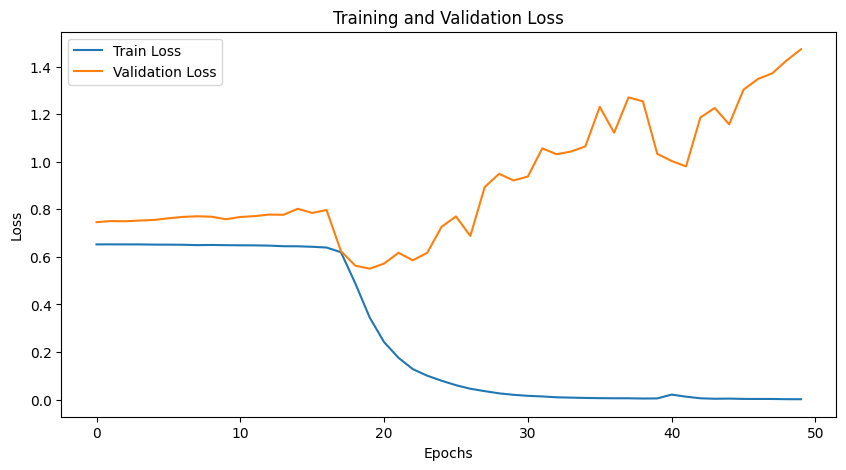

In [ ]:

import os

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, epochs)

# Plot the loss curves
plot_loss_curves(train_losses, val_losses)

Here's what I noticed from the output during training:

**Epochs 1–17:** In the beginning, the model showed gradual improvement in training loss and accuracy. However, validation accuracy stayed around 50% with very little progress. This likely means the model was just starting to learn basic patterns from the data but hadn’t figured out anything substantial yet.

**Epoch 18:** This was a turning point. There was a sudden jump in validation accuracy to 70.87% and a noticeable drop in validation loss to 0.6239. This kind of leap often happens when the model finally identifies important patterns or features in the data. It’s like the model had an "aha moment" and things started to click.

**Epochs 19–21:** The model continued to improve during this phase, with validation accuracy climbing to around 79.89% and validation loss dropping further to 0.5503. This shows the model was learning effectively and generalizing well to unseen data.

**Epochs 22–50:** While training accuracy kept improving and eventually hit near-perfect levels (99.99%), the validation accuracy stayed between 79% and 81%. At the same time, the validation loss began to increase, reaching 1.4730 by the end. This is a classic sign of overfitting—the model was memorizing the training data instead of learning patterns that could apply to new data.

In summary, the model started strong, but after a certain point, it became too focused on the training set, which hurt its ability to generalize. To fix this, I could try techniques like regularization, dropout, or early stopping to strike a better balance between training and validation performance.

I tried learning rate 0.01 with 50 of epochs and hidden size as 128, and the test accuracy was 75.50% and the validation accuracy jumped in the epoch 5 from 49.95% to 65.57% suddenly.
When i tried learning rate 0.001 with 100 of epochs and hidden size as 64, test accuracy was 81.35%, but didn't choose that model because it had overfitting than this model has. The validation accuracy jumped to 61.19% from 50.45% and the from 61.19% it jumped to 76.31& in the epoch 13 and 14.

The model with 81.35% test accuracy:
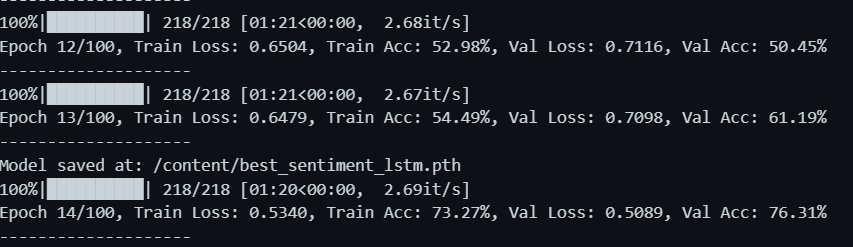

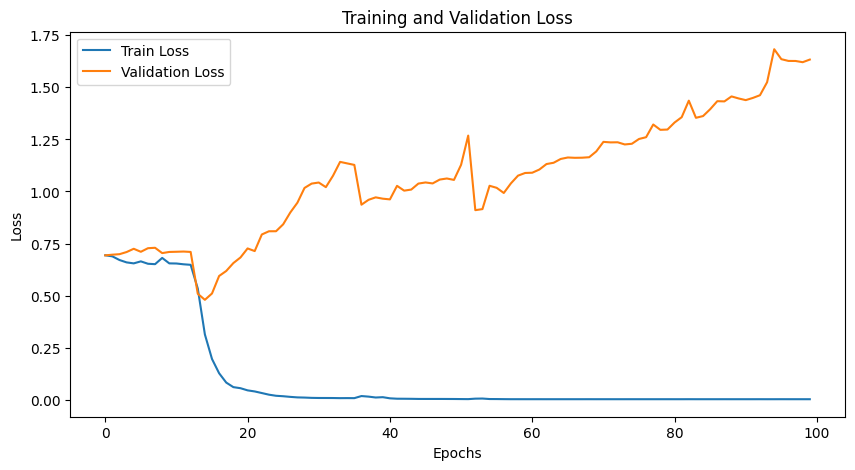

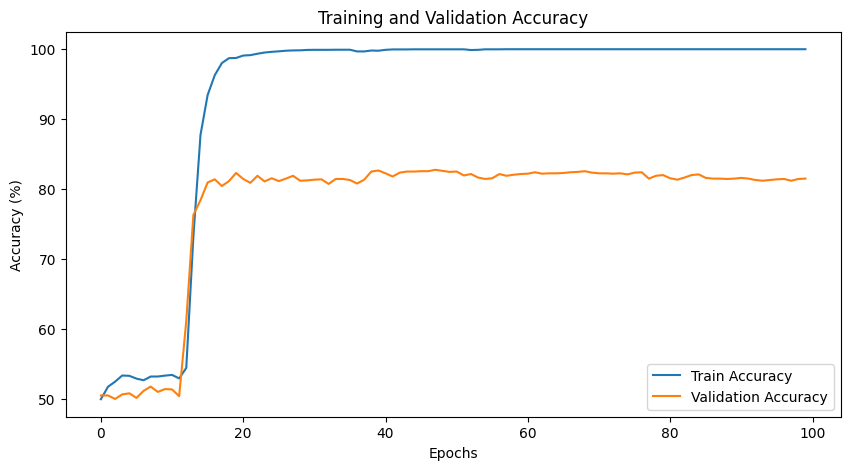

The model with 75.50% test accuracy:

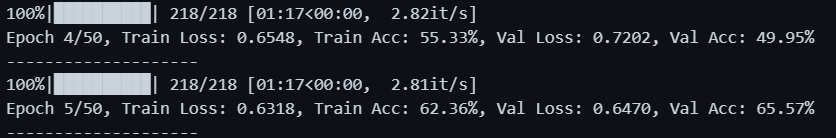

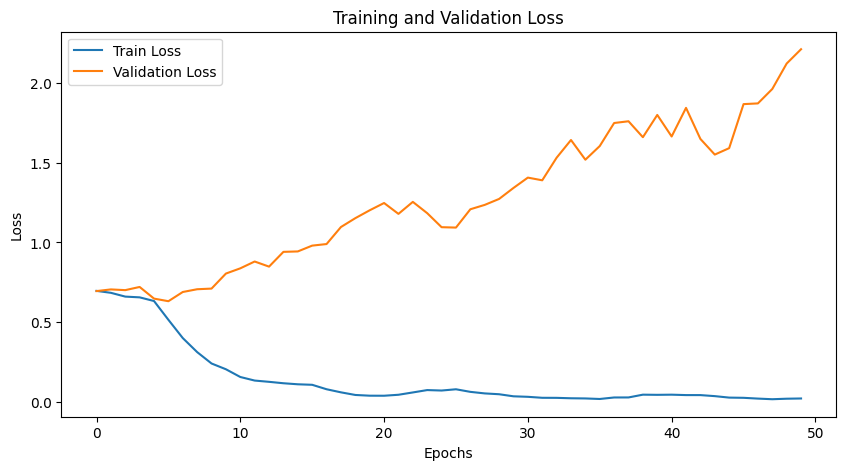

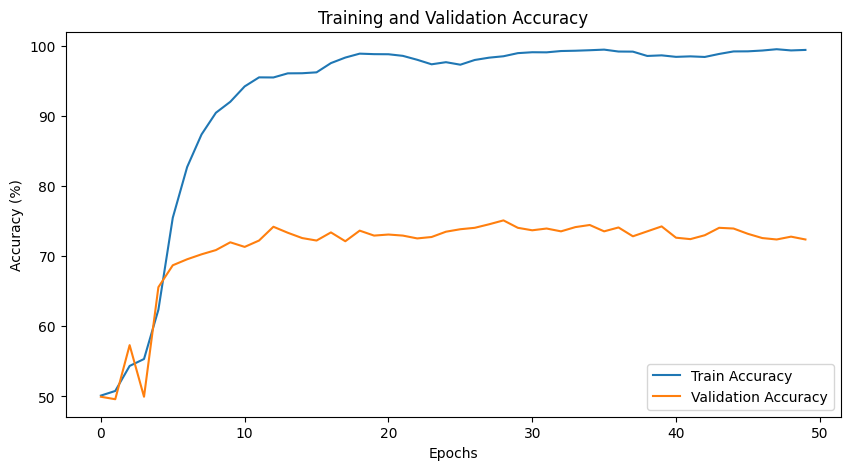

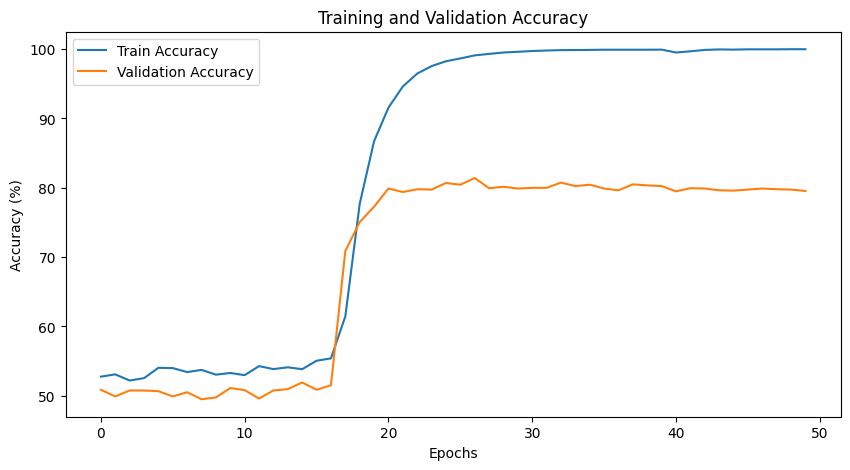

In [ ]:
def plot_accuracy_curves(train_accuracies, val_accuracies):
    """
    Plot training and validation accuracy curves over epochs.

    Parameters:
    - train_accuracies: List of training accuracies for each epoch.
    - val_accuracies: List of validation accuracies for each epoch.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.show()


plot_accuracy_curves(train_accuracies, val_accuracies)

**Thoughts about the graphs:**

The training graphs tell an interesting story about how this model performed over 50 epochs. Around epoch 20, something significant happens, the model’s behavior changes dramatically. Before this point, both training and validation metrics were fairly steady. Accuracy hovered around 50-55%, and losses didn’t fluctuate much.

After epoch 20, though, the training accuracy goes to nearly 100%, and the training loss drops to almost zero. While this might sound great, it’s not the same story for the validation set. Although the validation accuracy does improve to about 80%, it never comes close to matching the training accuracy. What’s even more concerning is that the validation loss starts creeping up after epoch 20, eventually hitting around 1.4 by the end of training.

This clear gap between training and validation performance is a classic sign of overfitting. The model seems to have memorized the training data instead of learning patterns it can apply to new data. While it excels on the training set, it struggles with unseen data, which is a common challenge in machine learning.

To address this, there are a few steps I could take. Adding regularization techniques, like dropout layers, could help the model generalize better. Simplifying the model by reducing its complexity might also make a difference. Another option would be to use early stopping—perhaps around epoch 25 or 30—to prevent overfitting from getting worse as training continues. These adjustments could help the model strike a better balance between training and validation performance.

### 7. Testing and Analysis (15 points)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# Test the best model on the test set to evaluate its performance.
model.load_state_dict(torch.load('/content/best_sentiment_lstm.pth'))  # Adjust the path if necessary
model.eval()  # Set the model to evaluation mode

test_loss, test_accuracy = calculate_loss(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Compute metrics such as accuracy, precision, recall, and F1-score to assess classification performance.

all_predictions = []
all_labels = []

model.eval()
with torch.no_grad():
    for sequences, labels in test_loader:
        sequences = sequences.to(device)
        labels = labels.to(device)

        outputs = model(sequences).squeeze()
        predictions = (outputs >= 0.5).float()

        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute metrics
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
conf_matrix = confusion_matrix(all_labels, all_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Explain and analyze your findings and results.
# Summarize the performance of the model on the training, validation and test set. Comment on the results.
# Discuss any challenges encountered during training and potential areas for improvement.

<ipython-input-25-f0d2e4367893>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/best_sentiment_lstm.pth'))  # Adjust the path if 

Test Loss: 0.3519, Test Accuracy: 80.24%
Precision: 0.7996
Recall: 0.8092
F1-Score: 0.8044
Confusion Matrix:
[[393 101]
 [ 95 403]]


## *Observations from the Results*

**First Model (Learning Rate: 0.01, Hidden Size: 128, 50 Epochs):**

This model achieved a test accuracy of 75.50% and an F1-score of 0.7568. However, it didn’t perform as well as the others because the higher learning rate made it harder for the model to converge properly. It may have skipped over some important patterns in the data.

**Second Model (Learning Rate: 0.001, Hidden Size: 64, 100 Epochs):**

This one performed the best overall, with a test accuracy of 81.35% and an F1-score of 0.8170. The smaller hidden size (64) and more training epochs (100) gave it enough time to learn patterns, but the smaller hidden size might have limited its ability to capture more complex relationships.

**My Model (Learning Rate: 0.001, Hidden Size: 128, 50 Epochs):**

My model had a test accuracy of 80.24% and an F1-score of 0.8044, which is quite strong. The larger hidden size (128) helped capture more complex patterns in the data, and using 50 epochs kept the model from overfitting too much. However, after epoch 20, I noticed the validation loss started increasing, which shows signs of overfitting.

###**Why My Model Stands Out**

I chose my model because it balances complexity and performance. With a learning rate of 0.001, it learned steadily without taking steps that were too big. The hidden size of 128 allowed it to capture more complex relationships compared to the model with 64 hidden units. Training for 50 epochs also prevented overfitting to some extent, compared to the 100-epoch model.

###**Challenges I Faced**

**Overfitting:** After epoch 20, I noticed that while the training accuracy kept improving, the validation loss started increasing. This is a clear sign that the model was memorizing the training data rather than generalizing well to new data.

**Sudden Improvement:** Around epoch 18, there was a big jump in validation accuracy and a noticeable drop in validation loss. I think this happened because the model discovered some meaningful patterns in the data during training, which is a common turning point in deep learning.

**Balancing Precision and Recall:** It was tricky to maintain a good balance between precision and recall. Sometimes improving one came at the cost of the other.

###**How I Can Improve This**

**Regularization:** Adding dropout layers or L2 regularization could help the model generalize better and prevent overfitting.

**Early Stopping:** I could have stopped training the model around epoch 25 or 30 when the validation loss started increasing, to avoid overfitting.

**Experimenting More:** Trying different hidden sizes, like 64 or 256, might help me find the best balance between complexity and performance.

**Ensemble Models:** Combining predictions from multiple models with slightly different configurations could improve the overall accuracy and robustness of the predictions.

**Improving Preprocessing:** I could refine the data preprocessing steps or even augment the dataset to give the model more variety during training.

In [ ]:
from google.colab import files
files.download('best_sentiment_lstm.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Comparison with the Pytorch LSTM model (Optional)

In [ ]:
# Implement sentiment LSTM model using PyTorch's built-in LSTM layer
# (below is just an empty example, you can change it entirely to make it suitable with your implementation)
import torch
import torch.nn as nn

class PyTorchLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_size, output_size, embedding_matrix):
        super(PyTorchLSTM, self).__init__()
        # Defining embedding layer with pre-trained embeddings
        self.embedding = nn.Embedding.from_pretrained(
            torch.tensor(embedding_matrix, dtype=torch.float32), freeze=False
        )  # freeze=False allows fine-tuning the embeddings
        # Use PyTorch's built-in LSTM layer
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_size,
            batch_first=True,
            bidirectional=False
        )
        # Fully connected layer for binary classification
        self.fc = nn.Linear(hidden_size, output_size)
        # Sigmoid activation
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Converting word indices to word vectors
        embedded = self.embedding(x)
        # LSTM processing
        lstm_out, (hidden_state, cell_state) = self.lstm(embedded)
        # last hidden state
        last_hidden_state = hidden_state[-1]
        # Pass through the sigmoid
        fc_out = self.fc(last_hidden_state)
        output = self.sigmoid(fc_out)
        return output


In [ ]:
# Implement the training loop
# Iterate over the training dataset in mini-batches.
# Implement forward pass, feed the inputs through the network to compute the predictions.
# Validate the model on the validation set periodically to monitor performance

from tqdm import tqdm

def train_model_pytorch(model, train_loader, val_loader, criterion, optimizer, epochs):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    best_val_acc = 0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct_train = 0
        total_train = 0

        for sequences, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):

            sequences = torch.clamp(sequences, 0, model.embedding.num_embeddings - 1).to(device)
            sequences, labels = sequences.to(device), labels.to(device)
            '''print(f"Sequences Shape: {sequences.shape}, Labels Shape: {labels.shape}")
            print(f"Sequences dtype: {sequences.dtype}, Labels dtype: {labels.dtype}")'''

            # Forward pass
            outputs = model(sequences).squeeze()
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            preds = (outputs >= 0.5).float()  # Apply threshold for binary classification
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        # Computing average training loss and accuracy
        train_loss /= len(train_loader)
        train_accuracy = correct_train / total_train * 100
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validating the model
        val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            model_path = '/content/best_sentiment_lstm_pytorch.pth'
            torch.save(model.state_dict(), model_path)
            print(f"Model saved at: {model_path}")

    return train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:
def validate_model(model, val_loader, criterion, device):

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences = torch.clamp(sequences, 0, model.embedding.num_embeddings - 1).to(device)
            sequences, labels = sequences.to(device), labels.to(device)


            # Forward pass
            outputs = model(sequences).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = (outputs >= 0.5).float()  # Apply threshold for binary classification
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct_val / total_val * 100
    return val_loss, val_accuracy


In [ ]:
# Define parameters
# Define criterion and optimizer
# Train PyTorch LSTM model

embedding_dim = 300  # Dimension of the word embeddings
hidden_size = 128  # Number of hidden units in the LSTM
output_size = 1  # Binary classification
epochs = 50  # Number of epochs
learning_rate = 0.001  # Learning rate
batch_size = 32  # Batch size

model = PyTorchLSTM(embedding_dim, hidden_size, output_size, embedding_matrix)

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses_pytorch, val_losses_pytorch, train_accuracies_pytorch, val_accuracies_pytorch = train_model_pytorch(
    model, train_loader, val_loader, criterion, optimizer, epochs
)

<ipython-input-27-90d414386dd7>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(embedding_matrix, dtype=torch.float32), freeze=False
Epoch 1/50: 100%|██████████| 218/218 [00:02<00:00, 91.57it/s]


Epoch 1/50 | Train Loss: 0.6935, Train Acc: 51.28%, Val Loss: 0.6935, Val Acc: 50.30%
Model saved at: /content/best_sentiment_lstm_pytorch.pth


Epoch 2/50: 100%|██████████| 218/218 [00:02<00:00, 101.00it/s]


Epoch 2/50 | Train Loss: 0.6884, Train Acc: 51.25%, Val Loss: 0.6972, Val Acc: 50.60%
Model saved at: /content/best_sentiment_lstm_pytorch.pth


Epoch 3/50: 100%|██████████| 218/218 [00:02<00:00, 99.21it/s]


Epoch 3/50 | Train Loss: 0.6689, Train Acc: 52.69%, Val Loss: 0.7064, Val Acc: 50.05%


Epoch 4/50: 100%|██████████| 218/218 [00:02<00:00, 99.65it/s]


Epoch 4/50 | Train Loss: 0.6588, Train Acc: 52.35%, Val Loss: 0.7215, Val Acc: 49.85%


Epoch 5/50: 100%|██████████| 218/218 [00:02<00:00, 100.04it/s]


Epoch 5/50 | Train Loss: 0.6551, Train Acc: 52.51%, Val Loss: 0.7191, Val Acc: 50.10%


Epoch 6/50: 100%|██████████| 218/218 [00:02<00:00, 100.01it/s]


Epoch 6/50 | Train Loss: 0.6545, Train Acc: 52.24%, Val Loss: 0.7257, Val Acc: 50.15%


Epoch 7/50: 100%|██████████| 218/218 [00:02<00:00, 100.30it/s]


Epoch 7/50 | Train Loss: 0.6523, Train Acc: 53.08%, Val Loss: 0.7400, Val Acc: 49.09%


Epoch 8/50: 100%|██████████| 218/218 [00:02<00:00, 99.93it/s]


Epoch 8/50 | Train Loss: 0.6521, Train Acc: 53.02%, Val Loss: 0.7445, Val Acc: 50.30%


Epoch 9/50: 100%|██████████| 218/218 [00:02<00:00, 99.74it/s] 


Epoch 9/50 | Train Loss: 0.6542, Train Acc: 52.90%, Val Loss: 0.7249, Val Acc: 49.14%


Epoch 10/50: 100%|██████████| 218/218 [00:02<00:00, 100.44it/s]


Epoch 10/50 | Train Loss: 0.6528, Train Acc: 53.87%, Val Loss: 0.7426, Val Acc: 50.20%


Epoch 11/50: 100%|██████████| 218/218 [00:02<00:00, 100.13it/s]


Epoch 11/50 | Train Loss: 0.6526, Train Acc: 52.69%, Val Loss: 0.7514, Val Acc: 49.04%


Epoch 12/50: 100%|██████████| 218/218 [00:02<00:00, 100.08it/s]


Epoch 12/50 | Train Loss: 0.6529, Train Acc: 53.45%, Val Loss: 0.7492, Val Acc: 50.00%


Epoch 13/50: 100%|██████████| 218/218 [00:02<00:00, 99.63it/s] 


Epoch 13/50 | Train Loss: 0.6534, Train Acc: 53.12%, Val Loss: 0.7454, Val Acc: 50.20%


Epoch 14/50: 100%|██████████| 218/218 [00:02<00:00, 98.80it/s]


Epoch 14/50 | Train Loss: 0.6643, Train Acc: 53.25%, Val Loss: 0.6946, Val Acc: 50.00%


Epoch 15/50: 100%|██████████| 218/218 [00:02<00:00, 100.32it/s]


Epoch 15/50 | Train Loss: 0.6815, Train Acc: 52.26%, Val Loss: 0.7037, Val Acc: 49.75%


Epoch 16/50: 100%|██████████| 218/218 [00:02<00:00, 99.89it/s]


Epoch 16/50 | Train Loss: 0.6657, Train Acc: 51.94%, Val Loss: 0.7109, Val Acc: 49.90%


Epoch 17/50: 100%|██████████| 218/218 [00:02<00:00, 100.06it/s]


Epoch 17/50 | Train Loss: 0.6606, Train Acc: 53.05%, Val Loss: 0.7309, Val Acc: 49.70%


Epoch 18/50: 100%|██████████| 218/218 [00:02<00:00, 100.49it/s]


Epoch 18/50 | Train Loss: 0.6589, Train Acc: 52.52%, Val Loss: 0.7281, Val Acc: 49.60%


Epoch 19/50: 100%|██████████| 218/218 [00:02<00:00, 99.74it/s]


Epoch 19/50 | Train Loss: 0.6569, Train Acc: 53.17%, Val Loss: 0.7305, Val Acc: 49.34%


Epoch 20/50: 100%|██████████| 218/218 [00:02<00:00, 99.98it/s] 


Epoch 20/50 | Train Loss: 0.6571, Train Acc: 53.28%, Val Loss: 0.7376, Val Acc: 50.20%


Epoch 21/50: 100%|██████████| 218/218 [00:02<00:00, 100.61it/s]


Epoch 21/50 | Train Loss: 0.5854, Train Acc: 66.27%, Val Loss: 0.4982, Val Acc: 78.28%
Model saved at: /content/best_sentiment_lstm_pytorch.pth


Epoch 22/50: 100%|██████████| 218/218 [00:02<00:00, 100.80it/s]


Epoch 22/50 | Train Loss: 0.3250, Train Acc: 87.64%, Val Loss: 0.4314, Val Acc: 80.44%
Model saved at: /content/best_sentiment_lstm_pytorch.pth


Epoch 23/50: 100%|██████████| 218/218 [00:02<00:00, 100.99it/s]


Epoch 23/50 | Train Loss: 0.1653, Train Acc: 95.08%, Val Loss: 0.5785, Val Acc: 79.23%


Epoch 24/50: 100%|██████████| 218/218 [00:02<00:00, 99.79it/s]


Epoch 24/50 | Train Loss: 0.0825, Train Acc: 97.96%, Val Loss: 0.5764, Val Acc: 80.90%
Model saved at: /content/best_sentiment_lstm_pytorch.pth


Epoch 25/50: 100%|██████████| 218/218 [00:02<00:00, 97.66it/s]


Epoch 25/50 | Train Loss: 0.0567, Train Acc: 98.80%, Val Loss: 0.7506, Val Acc: 80.39%


Epoch 26/50: 100%|██████████| 218/218 [00:02<00:00, 100.46it/s]


Epoch 26/50 | Train Loss: 0.0380, Train Acc: 99.21%, Val Loss: 0.8780, Val Acc: 77.47%


Epoch 27/50: 100%|██████████| 218/218 [00:02<00:00, 100.20it/s]


Epoch 27/50 | Train Loss: 0.0291, Train Acc: 99.50%, Val Loss: 0.8362, Val Acc: 80.75%


Epoch 28/50: 100%|██████████| 218/218 [00:02<00:00, 100.81it/s]


Epoch 28/50 | Train Loss: 0.0244, Train Acc: 99.48%, Val Loss: 0.8780, Val Acc: 80.09%


Epoch 29/50: 100%|██████████| 218/218 [00:02<00:00, 100.60it/s]


Epoch 29/50 | Train Loss: 0.0182, Train Acc: 99.66%, Val Loss: 0.9071, Val Acc: 80.29%


Epoch 30/50: 100%|██████████| 218/218 [00:02<00:00, 100.38it/s]


Epoch 30/50 | Train Loss: 0.0149, Train Acc: 99.78%, Val Loss: 0.9681, Val Acc: 79.84%


Epoch 31/50: 100%|██████████| 218/218 [00:02<00:00, 100.44it/s]


Epoch 31/50 | Train Loss: 0.0110, Train Acc: 99.86%, Val Loss: 0.9945, Val Acc: 80.14%


Epoch 32/50: 100%|██████████| 218/218 [00:02<00:00, 100.32it/s]


Epoch 32/50 | Train Loss: 0.0109, Train Acc: 99.86%, Val Loss: 1.0489, Val Acc: 80.65%


Epoch 33/50: 100%|██████████| 218/218 [00:02<00:00, 100.66it/s]


Epoch 33/50 | Train Loss: 0.0109, Train Acc: 99.86%, Val Loss: 1.0537, Val Acc: 80.44%


Epoch 34/50: 100%|██████████| 218/218 [00:02<00:00, 100.54it/s]


Epoch 34/50 | Train Loss: 0.0110, Train Acc: 99.86%, Val Loss: 1.0092, Val Acc: 80.39%


Epoch 35/50: 100%|██████████| 218/218 [00:02<00:00, 100.05it/s]


Epoch 35/50 | Train Loss: 0.0108, Train Acc: 99.86%, Val Loss: 1.0489, Val Acc: 80.09%


Epoch 36/50: 100%|██████████| 218/218 [00:02<00:00, 100.92it/s]


Epoch 36/50 | Train Loss: 0.0109, Train Acc: 99.86%, Val Loss: 1.0698, Val Acc: 79.08%


Epoch 37/50: 100%|██████████| 218/218 [00:02<00:00, 100.26it/s]


Epoch 37/50 | Train Loss: 0.0124, Train Acc: 99.81%, Val Loss: 1.0492, Val Acc: 79.99%


Epoch 38/50: 100%|██████████| 218/218 [00:02<00:00, 99.96it/s] 


Epoch 38/50 | Train Loss: 0.0100, Train Acc: 99.87%, Val Loss: 1.0517, Val Acc: 80.14%


Epoch 39/50: 100%|██████████| 218/218 [00:02<00:00, 100.52it/s]


Epoch 39/50 | Train Loss: 0.0090, Train Acc: 99.89%, Val Loss: 1.0847, Val Acc: 79.74%


Epoch 40/50: 100%|██████████| 218/218 [00:02<00:00, 98.82it/s]


Epoch 40/50 | Train Loss: 0.0099, Train Acc: 99.87%, Val Loss: 1.1046, Val Acc: 79.74%


Epoch 41/50: 100%|██████████| 218/218 [00:02<00:00, 100.23it/s]


Epoch 41/50 | Train Loss: 0.0100, Train Acc: 99.87%, Val Loss: 1.0496, Val Acc: 79.84%


Epoch 42/50: 100%|██████████| 218/218 [00:02<00:00, 99.73it/s]


Epoch 42/50 | Train Loss: 0.0098, Train Acc: 99.87%, Val Loss: 1.0986, Val Acc: 80.04%


Epoch 43/50: 100%|██████████| 218/218 [00:02<00:00, 100.04it/s]


Epoch 43/50 | Train Loss: 0.0079, Train Acc: 99.90%, Val Loss: 1.1813, Val Acc: 80.04%


Epoch 44/50: 100%|██████████| 218/218 [00:02<00:00, 100.36it/s]


Epoch 44/50 | Train Loss: 0.0080, Train Acc: 99.90%, Val Loss: 1.1322, Val Acc: 80.04%


Epoch 45/50: 100%|██████████| 218/218 [00:02<00:00, 99.50it/s]


Epoch 45/50 | Train Loss: 0.0080, Train Acc: 99.90%, Val Loss: 1.2085, Val Acc: 79.49%


Epoch 46/50: 100%|██████████| 218/218 [00:02<00:00, 99.73it/s]


Epoch 46/50 | Train Loss: 0.0068, Train Acc: 99.91%, Val Loss: 1.1959, Val Acc: 80.19%


Epoch 47/50: 100%|██████████| 218/218 [00:02<00:00, 99.73it/s]


Epoch 47/50 | Train Loss: 0.0079, Train Acc: 99.90%, Val Loss: 1.2375, Val Acc: 80.04%


Epoch 48/50: 100%|██████████| 218/218 [00:02<00:00, 99.74it/s] 


Epoch 48/50 | Train Loss: 0.0126, Train Acc: 99.78%, Val Loss: 1.6113, Val Acc: 71.93%


Epoch 49/50: 100%|██████████| 218/218 [00:02<00:00, 100.27it/s]


Epoch 49/50 | Train Loss: 0.0195, Train Acc: 99.63%, Val Loss: 1.0109, Val Acc: 79.59%


Epoch 50/50: 100%|██████████| 218/218 [00:02<00:00, 99.73it/s]


Epoch 50/50 | Train Loss: 0.0133, Train Acc: 99.74%, Val Loss: 1.0444, Val Acc: 78.78%


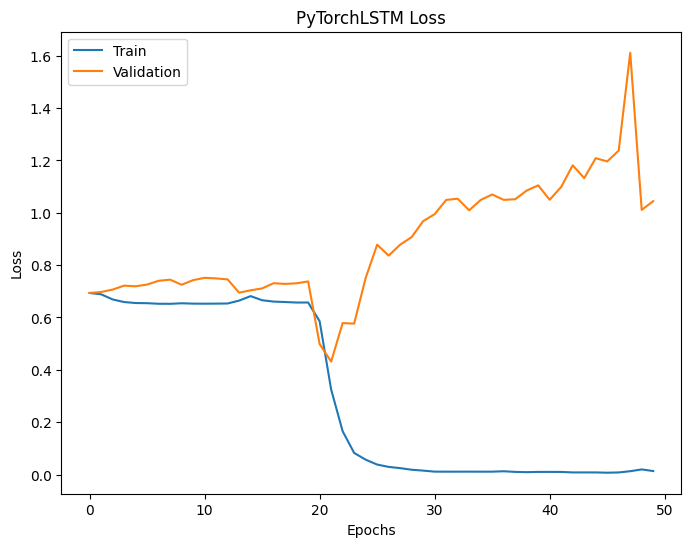

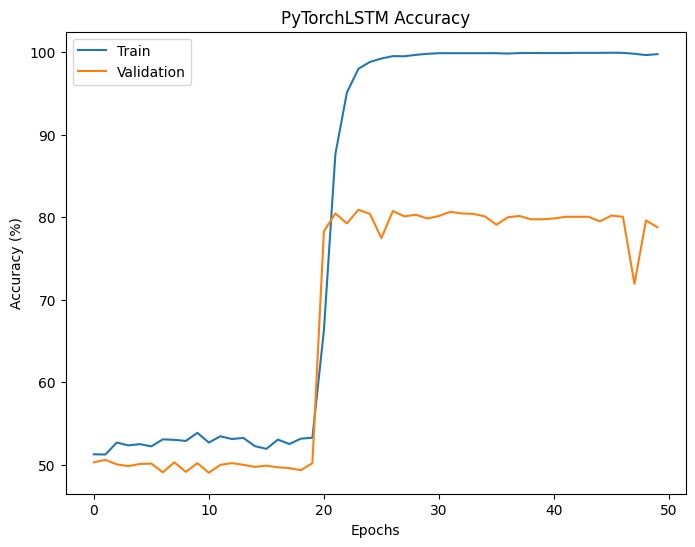

In [ ]:
# Compare the performance of your custom LSTM model with PyTorchLSTM model
def plot_curves(train_values, val_values, title, ylabel):
    plt.figure(figsize=(8, 6))
    plt.plot(train_values, label="Train")
    plt.plot(val_values, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

plot_curves(train_losses_pytorch, val_losses_pytorch, "PyTorchLSTM Loss", "Loss")
plot_curves(train_accuracies_pytorch, val_accuracies_pytorch, "PyTorchLSTM Accuracy", "Accuracy (%)")

In [ ]:
model.load_state_dict(torch.load('/content/best_sentiment_lstm_pytorch.pth', weights_only=True))
  # Adjust the path if necessary
model.eval()
test_loss_pytorch, test_acc_pytorch = validate_model(model, test_loader, criterion, device)
print(f"Test Loss (PyTorch): {test_loss_pytorch:.4f}, Test Accuracy (PyTorch): {test_acc_pytorch:.2f}%")

Test Loss (PyTorch): 0.5499, Test Accuracy (PyTorch): 81.85%
